In [ ]:
CS4168 - Project
Ricard         -
ShuangJia Yang -
Xinyi Li       - 21147426
Yang Ye        -

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# EDA

### load dataset

In [2]:
df = pd.read_csv('./mushrooms_sample.csv')

### Quick Data Exploration

In [3]:
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,t,n,f,c,b,u,t,...,p,g,p,w,o,p,k,v,d,e
1,f,y,g,t,n,f,c,b,u,t,...,w,g,p,w,o,p,k,v,d,e
2,x,s,p,t,n,f,c,b,w,e,...,w,e,p,w,t,e,w,c,w,e
3,b,s,w,f,n,f,w,b,g,e,...,w,w,p,w,t,p,w,n,g,e
4,f,y,e,t,n,f,c,b,w,t,...,p,p,p,w,o,p,n,v,d,e


In [4]:
df.tail(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3995,f,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,p,p
3996,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,g,p
3997,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,m,p
3998,f,y,e,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,l,p
3999,f,s,n,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p


In [6]:
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (4000, 23)


####   ---Quick Examination of Categorical Attributes

In [7]:
df['class'].value_counts()

e    2000
p    2000
Name: class, dtype: int64

In [8]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [10]:
df = df.drop(['stalk-root','stalk-shape','stalk-surface-above-ring',
              'stalk-surface-below-ring','stalk-color-below-ring','stalk-color-above-ring',
              'veil-type','veil-color'], axis=1)
df.isna().sum()

cap-shape            0
cap-surface          0
cap-color            0
bruises%3F           0
odor                 0
gill-attachment      0
gill-spacing         0
gill-size            0
gill-color           0
ring-number          0
ring-type            0
spore-print-color    0
population           0
habitat              0
class                0
dtype: int64

In [11]:
df['odor'].value_counts()

n    1692
f    1099
s     288
y     285
l     190
a     188
p     142
c     100
m      16
Name: odor, dtype: int64

In [13]:
df['odor'].count()

4000

In [14]:
df['cap-shape'].value_counts()

x    1758
f    1593
k     411
b     217
s      20
c       1
Name: cap-shape, dtype: int64

In [15]:
df['habitat'].value_counts()

d    1548
g    1023
p     582
l     404
u     197
m     148
w      98
Name: habitat, dtype: int64

In [16]:
df['population'].value_counts()

v    2028
y     839
s     603
n     193
a     171
c     166
Name: population, dtype: int64

In [17]:
df['cap-color'].value_counts()

n    1154
g     917
e     727
w     501
y     496
b      88
p      83
c      17
r      10
u       7
Name: cap-color, dtype: int64

In [45]:
df.dtypes

cap-shape               object
cap-surface             object
cap-color               object
bruises%3F               int32
odor                    object
gill-attachment          int32
gill-spacing             int32
gill-size                int32
gill-color              object
ring-number             object
ring-type               object
spore-print-color       object
population              object
habitat                 object
class                    int32
bruises&gill-spacing    object
dtype: object

### plot the frequency histogram of any attribute

In [27]:
frequency_table = df['odor'].value_counts(ascending=True)
print('Frequency Table for odor:') 
print(frequency_table)

Frequency Table for odor:
m      16
c     100
p     142
a     188
l     190
y     285
s     288
f    1099
n    1692
Name: odor, dtype: int64


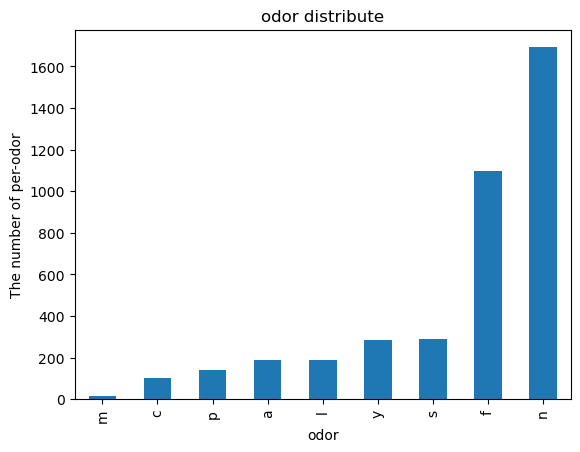

In [29]:
frequency_table.plot(kind='bar')
plt.xlabel('odor')
plt.ylabel('The number of per-odor')
plt.title('odor distribute')
plt.show()

### Change all attributes that have two valuess to 0 and 1

In [39]:
labelencoder=LabelEncoder()
for col in df.columns:
    if len(df[col].value_counts())==2:

        df[col]=labelencoder.fit_transform(df[col])

df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,ring-number,ring-type,spore-print-color,population,habitat,class,bruises&gill-spacing
0,x,f,e,1,n,1,0,0,u,o,p,k,v,d,0,"t,c"
1,f,y,g,1,n,1,0,0,u,o,p,k,v,d,0,"t,c"
2,x,s,p,1,n,1,0,0,w,t,e,w,c,w,0,"t,c"
3,b,s,w,0,n,1,1,0,g,t,p,w,n,g,0,"f,w"
4,f,y,e,1,n,1,0,0,w,o,p,n,v,d,0,"t,c"


In [40]:
df.dtypes

cap-shape               object
cap-surface             object
cap-color               object
bruises%3F               int32
odor                    object
gill-attachment          int32
gill-spacing             int32
gill-size                int32
gill-color              object
ring-number             object
ring-type               object
spore-print-color       object
population              object
habitat                 object
class                    int32
bruises&gill-spacing    object
dtype: object

### Frequency histogram of edible and poisonous mushrooms

C:\Users\22706\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


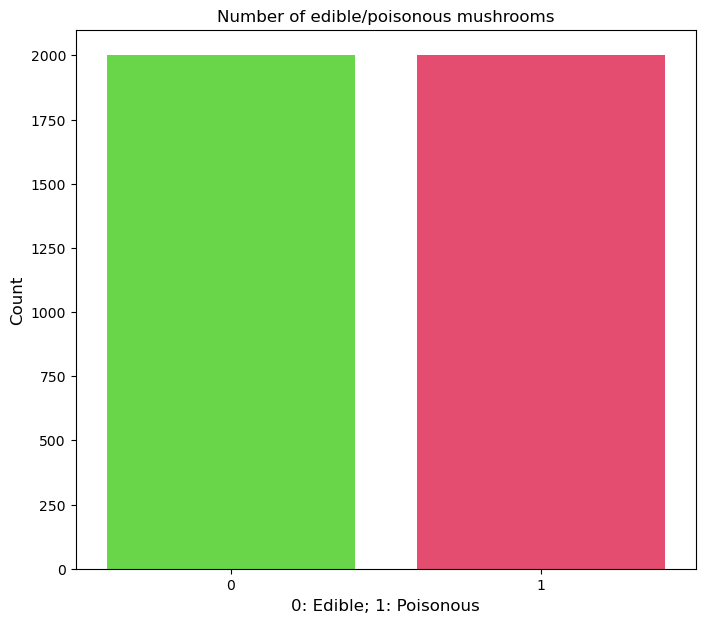

In [41]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('0: Edible; 1: Poisonous', fontsize=12)
plt.title('Number of edible/poisonous mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

### Heatmap of the attributes which value trans into 0,1

<AxesSubplot:>

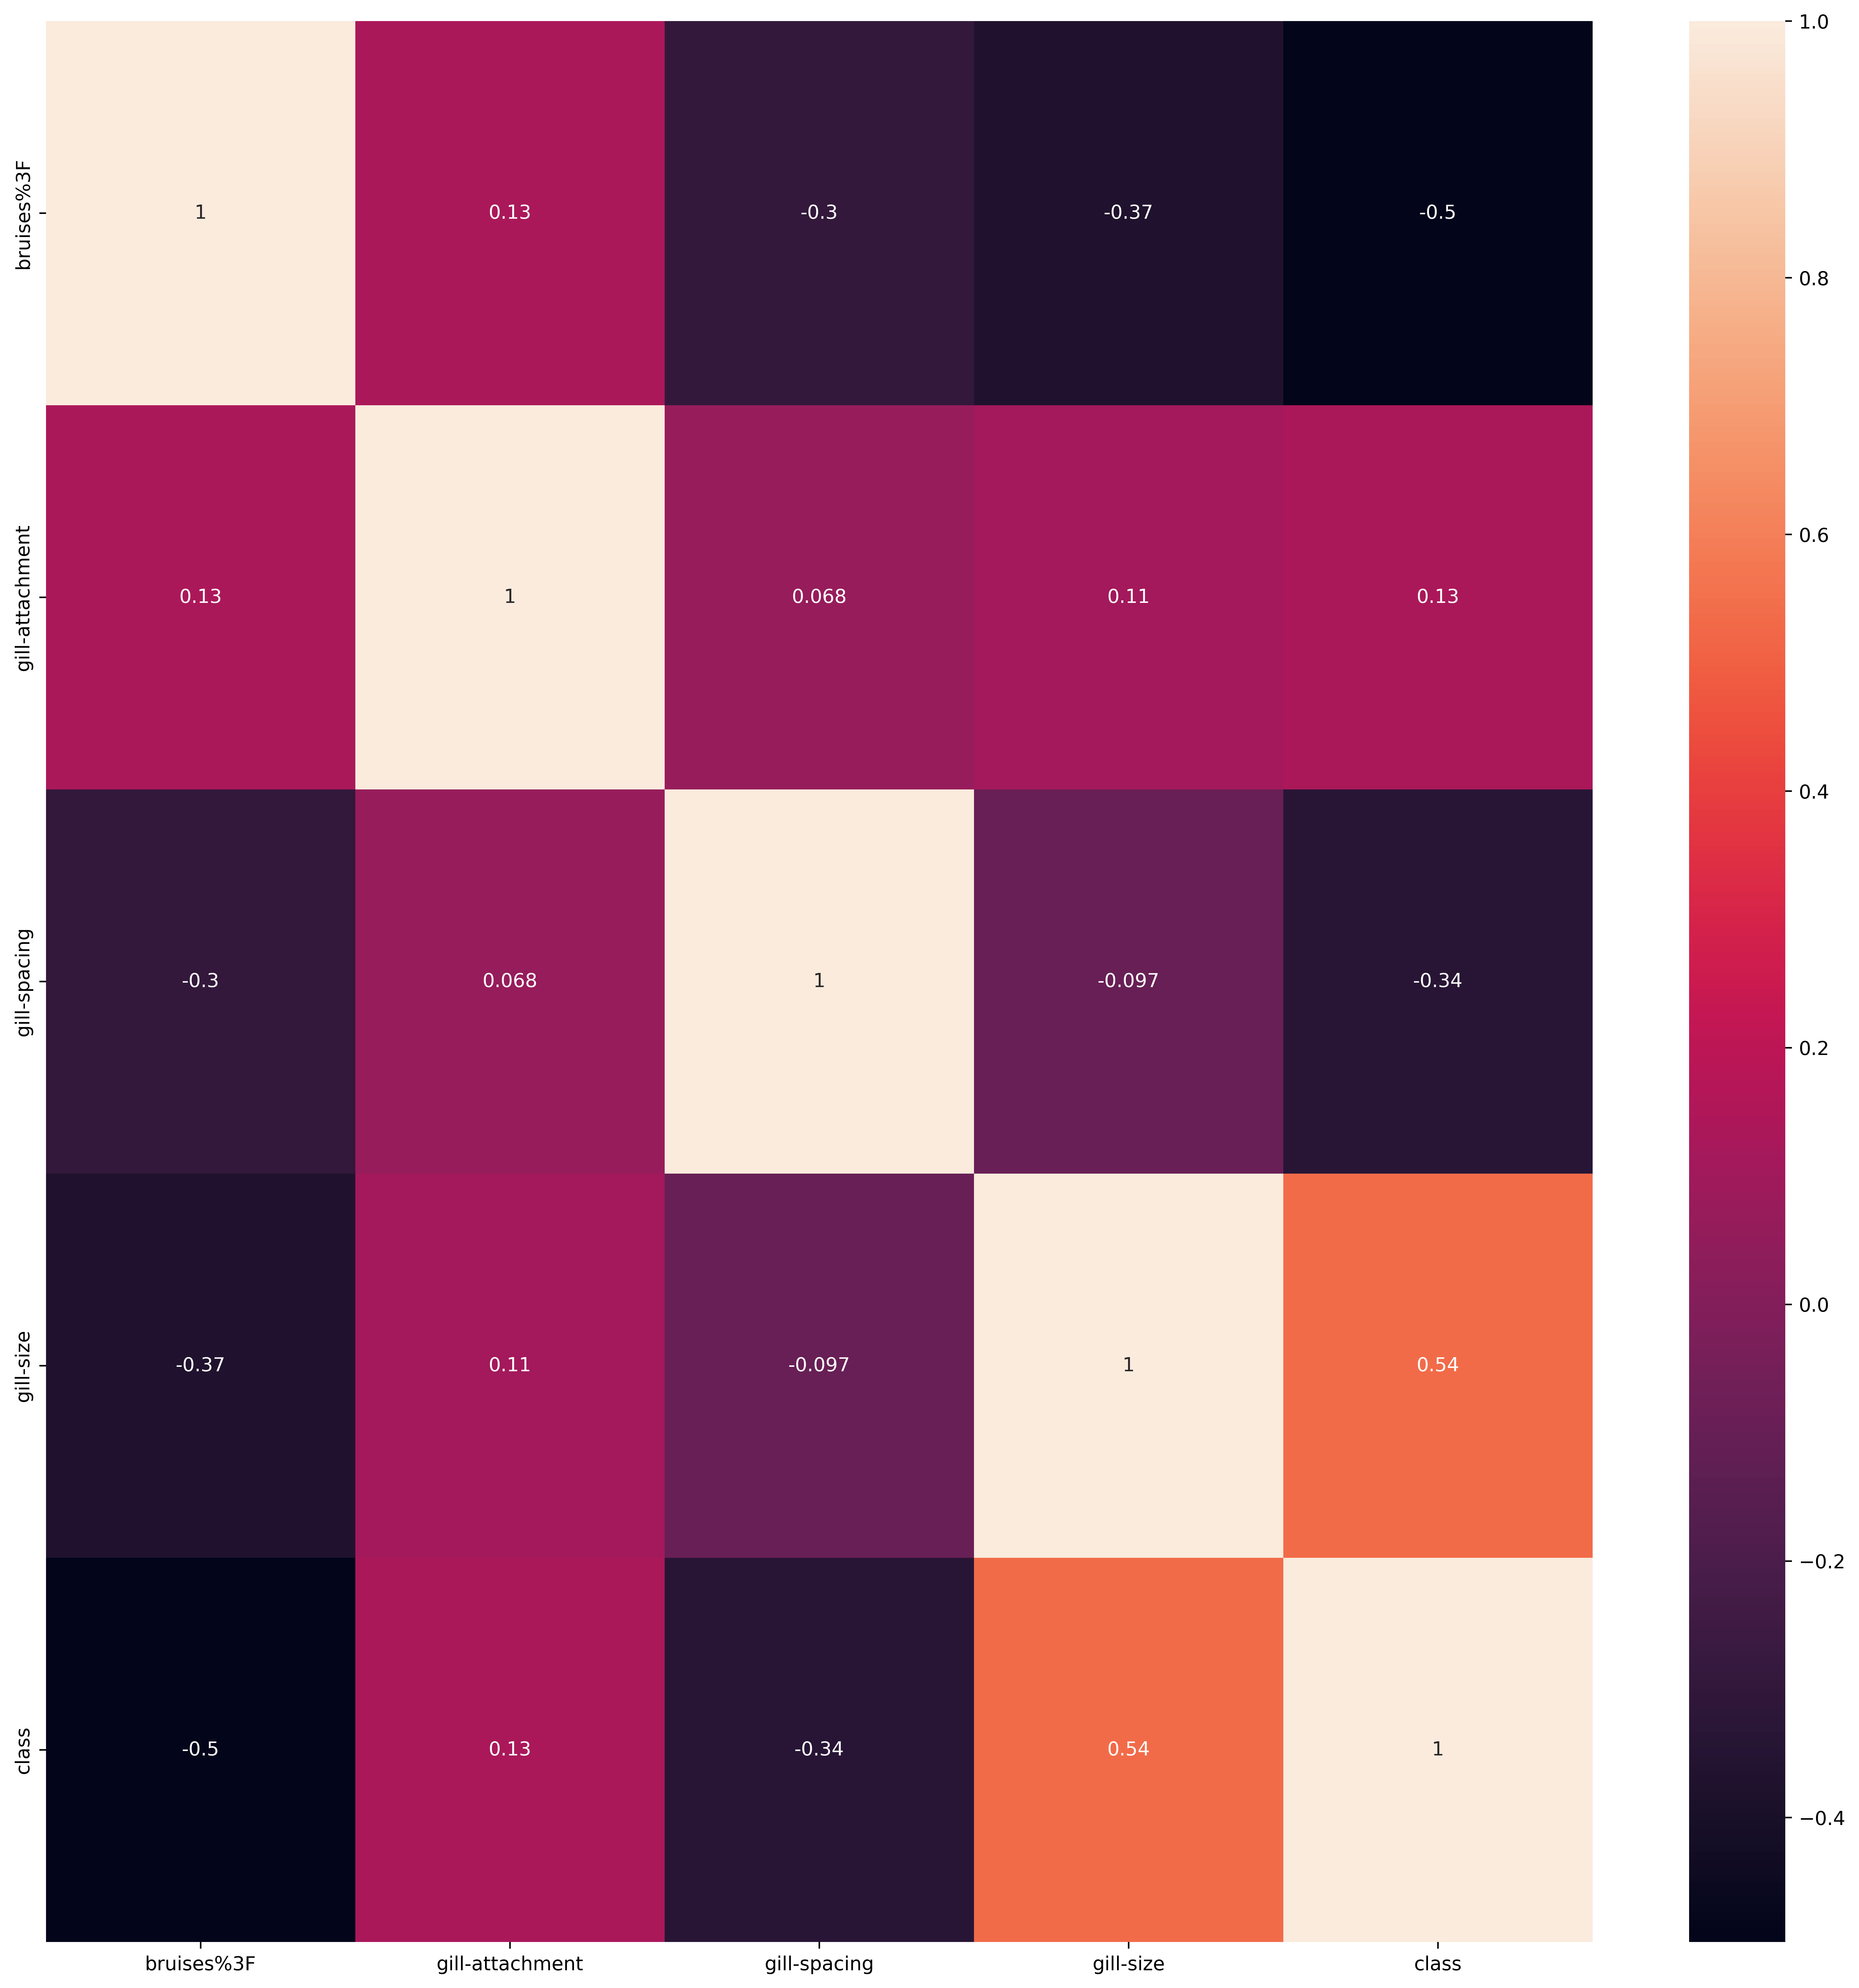

In [42]:
plt.figure(figsize=(18,18),dpi=500)
sns.heatmap(df.corr(),annot=True)

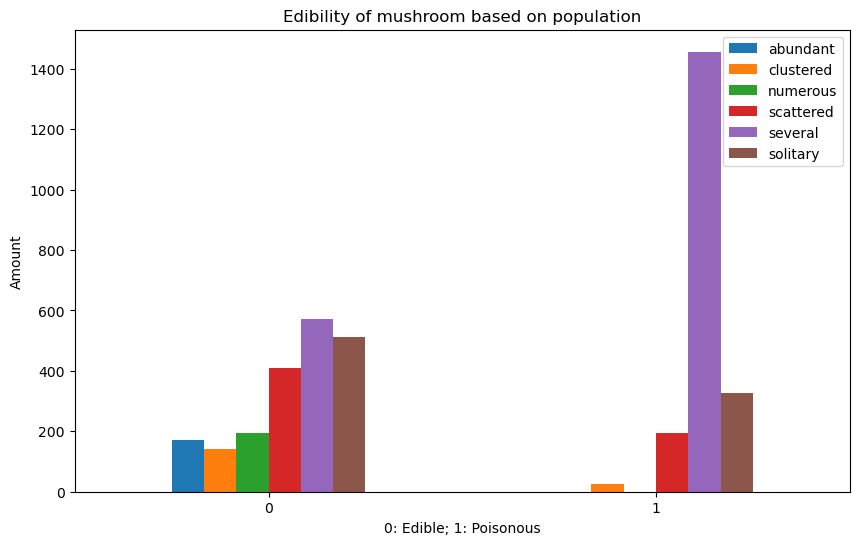

In [46]:
pd.crosstab(df['class'], df['population']).plot(kind="bar",
                                              figsize=(10, 6));
plt.title("Edibility of mushroom based on population")
plt.xlabel("0: Edible; 1: Poisonous")
plt.ylabel("Amount")
plt.legend(["abundant", "clustered", "numerous", "scattered", "several", "solitary"])
plt.xticks(rotation=0);

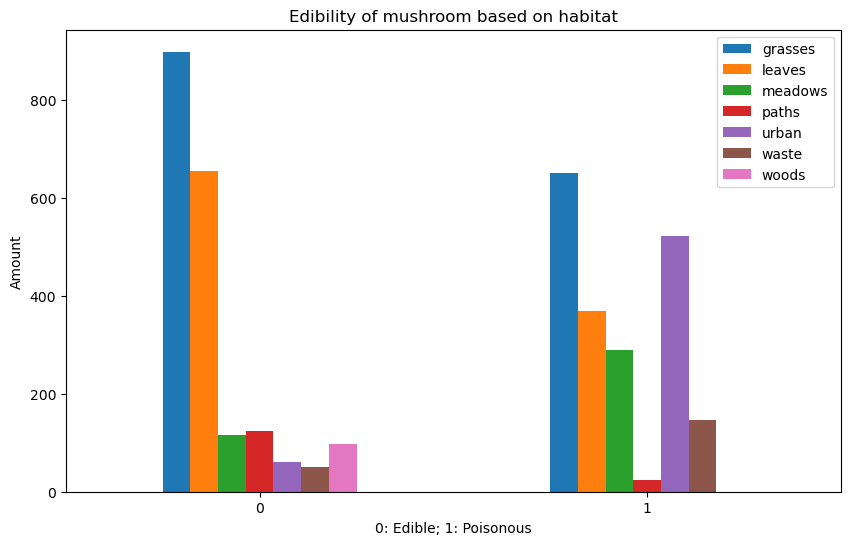

In [44]:
pd.crosstab(df['class'], df['habitat']).plot(kind="bar",
                                              figsize=(10, 6));
plt.title("Edibility of mushroom based on habitat")
plt.xlabel("0: Edible; 1: Poisonous")
plt.ylabel("Amount")
plt.legend(["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"])
plt.xticks(rotation=0);

According to the population distribution and living environment, I have concluded that several mushrooms have a high probability of being poisonous, and mushrooms that are abundant, clustered and numerous are generally edible mushrooms; mushrooms that grow on paths and woods are basically non-toxic. Poisonous, is grow in urban, probably because the pollution of the environment, but we can't judge whether the mushrooms growing on grass and leaves are poisonous according to the living environment, because they have the same probability.